# Principal Component Analysis with Cancer Data

In [41]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [42]:
# Importing the data as a data frame.  
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [43]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [44]:
# Perform basic EDA - Data type of each attribute.  
print("Data type of Dataset :\n",df.dtypes)

Data type of Dataset :
 ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [45]:
# Perform basic EDA - Shape of the data.
print("Shape of Dataset :",df.shape)

Shape of Dataset : (699, 11)


In [46]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

# Performing basic EDA - Checking the presence of missing values. 
print("Checking the presence of missing values :", df.info())


print("sum of NaN values :\n",df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
Checking the presence of missing values : None
sum of NaN values :
 ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei               

In [47]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
# Performing basic EDA - Descriptive Statistics or 5 point Summary of Numerical Attributes.
display("Descriptive Statistics :\n",df.describe(include="all").transpose())

'Descriptive Statistics :\n'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [48]:
# We could see "?" values in column, this should be removed from data set
# finding the number of columns containing ?

print ((df.astype(str) != '?').all(axis=0))

ID                              True
ClumpThickness                  True
Cell Size                       True
Cell Shape                      True
Marginal Adhesion               True
Single Epithelial Cell Size     True
Bare Nuclei                    False
Normal Nucleoli                 True
Bland Chromatin                 True
Mitoses                         True
Class                           True
dtype: bool


In [49]:
print("Total missing values in database is = " + str(df.isnull().sum().sum()))

Total missing values in database is = 0


In [50]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Replacing "?" by 0 
#df = df.replace( '?' , 0)
df.replace('?',df['Bare Nuclei'].mode()[0],inplace=True)

In [51]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [52]:
# finding the number of columns containing ?

print ((df.astype(str) != '?').all(axis=0))

ID                             True
ClumpThickness                 True
Cell Size                      True
Cell Shape                     True
Marginal Adhesion              True
Single Epithelial Cell Size    True
Bare Nuclei                    True
Normal Nucleoli                True
Bland Chromatin                True
Mitoses                        True
Class                          True
dtype: bool


In [53]:
# changing type of 'Bare Nuclei' column from object to 'int64'

df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')  

In [54]:
# Get count of rows having ?
df.shape

(699, 11)

In [55]:
df_dup=df[df.duplicated(keep='first')]
df_dup

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [56]:
print("duplicate rows",len(df_dup))

duplicate rows 9


In [57]:
print("original rows", len(df))

original rows 699


In [58]:
# dropping duplicate values 
df.drop_duplicates(keep=False,inplace=True)

In [59]:
df_dup=df[df.duplicated(keep=False) == True]
print("duplicate rows",len(df_dup))

duplicate rows 0


In [60]:
print("original rows", len(df))

original rows 681


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 698
Data columns (total 11 columns):
ID                             681 non-null int64
ClumpThickness                 681 non-null int64
Cell Size                      681 non-null int64
Cell Shape                     681 non-null int64
Marginal Adhesion              681 non-null int64
Single Epithelial Cell Size    681 non-null int64
Bare Nuclei                    681 non-null int64
Normal Nucleoli                681 non-null int64
Bland Chromatin                681 non-null int64
Mitoses                        681 non-null int64
Class                          681 non-null int64
dtypes: int64(11)
memory usage: 63.8 KB


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,681.0,1.076003e+06,622171.149803,61634.0,877943.0,1171845.0,1238633.0,13454352.0
ClumpThickness,681.0,4.440529e+00,2.819011,1.0,2.0,4.0,6.0,10.0
Cell Size,681.0,3.132159e+00,3.033176,1.0,1.0,1.0,5.0,10.0
Cell Shape,681.0,3.201175e+00,2.949436,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,681.0,2.848752e+00,2.880314,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,681.0,3.209985e+00,2.187186,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,681.0,3.478708e+00,3.612059,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,681.0,3.434655e+00,2.449893,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,681.0,2.904552e+00,3.081920,1.0,1.0,1.0,4.0,10.0
Mitoses,681.0,1.599119e+00,1.733561,1.0,1.0,1.0,1.0,10.0


In [63]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values. 

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [64]:
# Check for correlation of variable
df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.063979,-0.046162,-0.044057,-0.068737,-0.050750,-0.091114,-0.059546,-0.057029,-0.037702,-0.079944
ClumpThickness,-0.063979,1.000000,0.641402,0.652590,0.489078,0.512561,0.591328,0.563768,0.535161,0.350354,0.717653
Cell Size,-0.046162,0.641402,1.000000,0.903755,0.720542,0.741953,0.682397,0.763674,0.731454,0.461207,0.817266
Cell Shape,-0.044057,0.652590,0.903755,1.000000,0.698781,0.708565,0.700736,0.741308,0.729812,0.442043,0.816135
Marginal Adhesion,-0.068737,0.489078,0.720542,0.698781,1.000000,0.617348,0.678242,0.673094,0.601059,0.416363,0.705671
Single Epithelial Cell Size,-0.050750,0.512561,0.741953,0.708565,0.617348,1.000000,0.577150,0.625147,0.639145,0.486105,0.679304
Bare Nuclei,-0.091114,0.591328,0.682397,0.700736,0.678242,0.577150,1.000000,0.671267,0.581668,0.343282,0.814279
Normal Nucleoli,-0.059546,0.563768,0.763674,0.741308,0.673094,0.625147,0.671267,1.000000,0.672396,0.343374,0.756864
Bland Chromatin,-0.057029,0.535161,0.731454,0.729812,0.601059,0.639145,0.581668,0.672396,1.000000,0.426625,0.718572
Mitoses,-0.037702,0.350354,0.461207,0.442043,0.416363,0.486105,0.343282,0.343374,0.426625,1.000000,0.424750


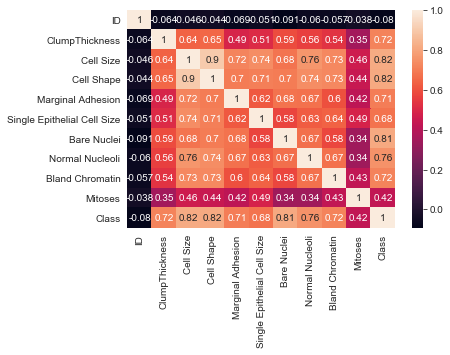

In [65]:
sns.heatmap(df.corr(), annot= True);  # finding the correlation between different columns.

In [66]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables. 

In [67]:
df=df.drop(columns=['ID'])

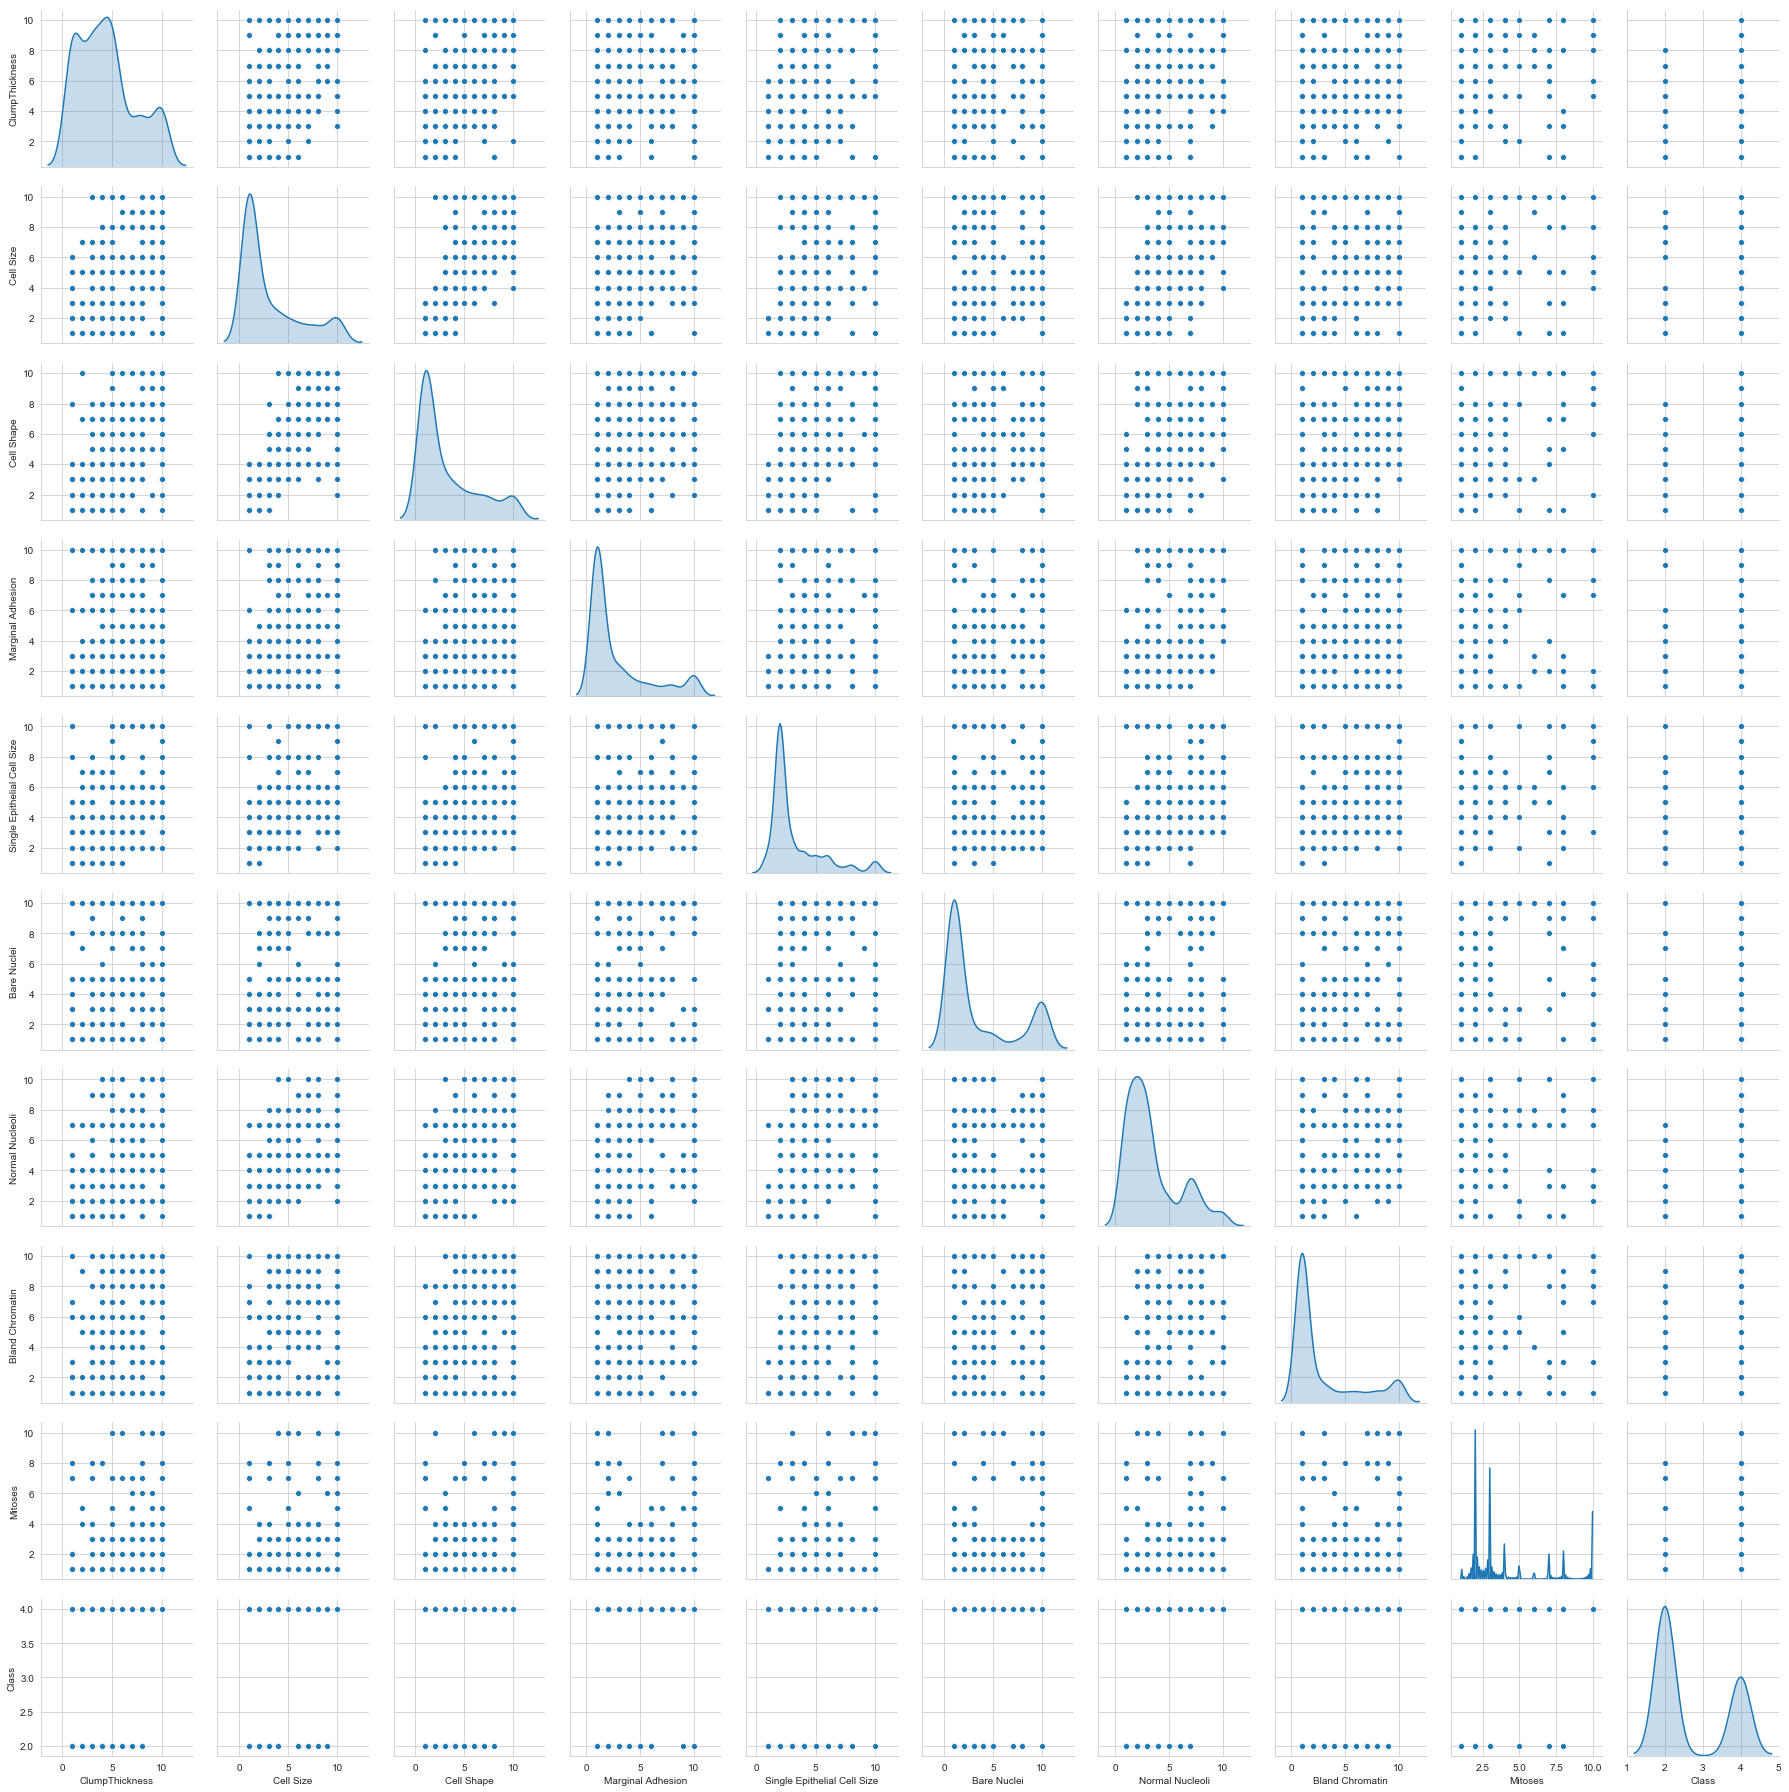

In [68]:
#Let us check for pair plots

import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(df,diag_kind='kde');

In [69]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10.        

In [70]:
df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [71]:
# We could see most of the outliers are now removed.        

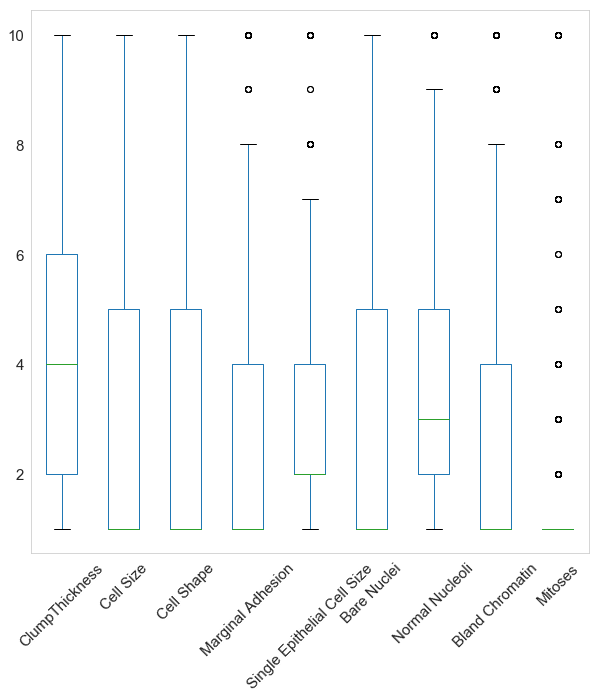

In [72]:
boxplot = df.boxplot(column=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
     'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
     'Bland Chromatin', 'Mitoses'], grid=False, rot=45, fontsize=15,figsize=(10, 10));

In [73]:
pd.crosstab(df['Mitoses'],df['Class'])

Class,2,4
Mitoses,,
1,433,130
2,8,27
3,2,29
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [74]:
df['Mitoses']=np.where(df['Mitoses']>2,2,df['Mitoses'])
pd.crosstab(df['Mitoses'],df['Class'])

Class,2,4
Mitoses,,
1,433,130
2,13,105


In [75]:
pd.crosstab(df['Marginal Adhesion'],df['Class'])

Class,2,4
Marginal Adhesion,,
1,363,30
2,37,17
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [76]:
df['Marginal Adhesion']=np.where(df['Marginal Adhesion']>8,4,df['Marginal Adhesion'])
pd.crosstab(df['Marginal Adhesion'],df['Class'])

Class,2,4
Marginal Adhesion,,
1,363,30
2,37,17
3,31,27
4,7,86
5,4,19
6,4,18
7,0,13
8,0,25


In [77]:
pd.crosstab(df['Single Epithelial Cell Size'],df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,42,1
2,355,23
3,29,41
4,7,41
5,5,34
6,2,39
7,3,9
8,2,17
9,0,2


In [78]:
df['Single Epithelial Cell Size']=np.where(df['Single Epithelial Cell Size']>7,4,df['Single Epithelial Cell Size'])
pd.crosstab(df['Single Epithelial Cell Size'],df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,42,1
2,355,23
3,29,41
4,10,88
5,5,34
6,2,39
7,3,9


In [79]:
pd.crosstab(df['Normal Nucleoli'],df['Class'])

Class,2,4
Normal Nucleoli,,
1,148,2
2,157,7
3,121,34
4,8,32
5,4,30
6,1,9
7,7,62
8,0,28
9,0,11


In [80]:
df['Normal Nucleoli']=np.where(df['Normal Nucleoli']>7,4,df['Normal Nucleoli'])
pd.crosstab(df['Normal Nucleoli'],df['Class'])

Class,2,4
Normal Nucleoli,,
1,148,2
2,157,7
3,121,34
4,8,91
5,4,30
6,1,9
7,7,62


In [81]:
pd.crosstab(df['Bland Chromatin'],df['Class'])

Class,2,4
Bland Chromatin,,
1,390,39
2,30,6
3,12,28
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [82]:
df['Bland Chromatin']=np.where(df['Bland Chromatin']>8,4,df['Bland Chromatin'])
pd.crosstab(df['Bland Chromatin'],df['Class'])

Class,2,4
Bland Chromatin,,
1,390,39
2,30,6
3,12,28
4,2,93
5,2,17
6,4,18
7,2,14
8,4,20


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,681.0,4.440529,2.819011,1.0,2.0,4.0,6.0,10.0
Cell Size,681.0,3.132159,3.033176,1.0,1.0,1.0,5.0,10.0
Cell Shape,681.0,3.201175,2.949436,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,681.0,2.327460,1.930398,1.0,1.0,1.0,4.0,8.0
Single Epithelial Cell Size,681.0,2.828194,1.406340,1.0,2.0,2.0,4.0,7.0
Bare Nuclei,681.0,3.478708,3.612059,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,681.0,3.013216,1.795780,1.0,2.0,3.0,4.0,7.0
Bland Chromatin,681.0,2.249633,1.952962,1.0,1.0,1.0,4.0,8.0
Mitoses,681.0,1.173275,0.378763,1.0,1.0,1.0,1.0,2.0
Class,681.0,2.690162,0.951488,2.0,2.0,2.0,4.0,4.0


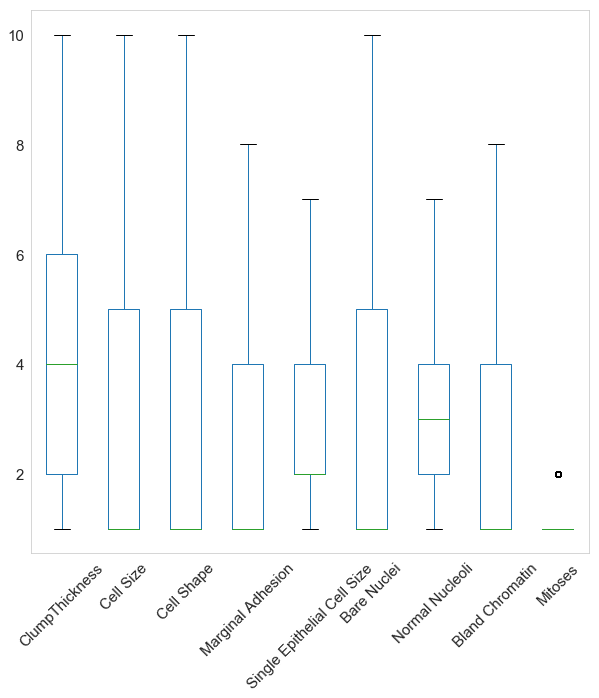

In [84]:
boxplot = df.boxplot(column=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
     'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
     'Bland Chromatin', 'Mitoses'], grid=False, rot=45, fontsize=15,figsize=(10, 10));

In [85]:
pd.crosstab(df['Mitoses'],df['Class'])

Class,2,4
Mitoses,,
1,433,130
2,13,105


In [86]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    if np.where(ys > upper_bound):
        ys = upper_bound
    if np.where(ys < lower_bound):
        ys = lower_bound
    i = np.where((ys > upper_bound) | (ys < lower_bound))
    return i 
    
for features in df.columns:
    print  (outliers_iqr ( df[features]))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [87]:
df=df.drop(columns=['Class'])

# Q6 Create a covariance matrix for identifying Principal components

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets

In [89]:
# PCA
# Step 1 - Create covariance matrix
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [90]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)

In [91]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00147059 0.64234491 0.65354921 0.49411701 0.53068289 0.59219745
  0.53123725 0.51418194 0.44416557]
 [0.64234491 1.00147059 0.90508434 0.70013302 0.7372815  0.68340039
  0.63372542 0.65872955 0.49149897]
 [0.65354921 0.90508434 1.00147059 0.66817624 0.71385842 0.70176656
  0.6231832  0.64144947 0.46307727]
 [0.49411701 0.70013302 0.66817624 1.00147059 0.64464837 0.65418952
  0.5871567  0.58219912 0.38141957]
 [0.53068289 0.7372815  0.71385842 0.64464837 1.00147059 0.62101965
  0.57531186 0.61891183 0.43207195]
 [0.59219745 0.68340039 0.70176656 0.65418952 0.62101965 1.00147059
  0.65179027 0.59200926 0.46559239]
 [0.53123725 0.63372542 0.6231832  0.5871567  0.57531186 0.65179027
  1.00147059 0.61510151 0.38853447]
 [0.51418194 0.65872955 0.64144947 0.58219912 0.61891183 0.59200926
  0.61510151 1.00147059 0.45502654]
 [0.44416557 0.49149897 0.46307727 0.38141957 0.43207195 0.46559239
  0.38853447 0.45502654 1.00147059]]


In [92]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[1.00147059 0.64234491 0.65354921 0.49411701 0.53068289 0.59219745
  0.53123725 0.51418194 0.44416557]
 [0.64234491 1.00147059 0.90508434 0.70013302 0.7372815  0.68340039
  0.63372542 0.65872955 0.49149897]
 [0.65354921 0.90508434 1.00147059 0.66817624 0.71385842 0.70176656
  0.6231832  0.64144947 0.46307727]
 [0.49411701 0.70013302 0.66817624 1.00147059 0.64464837 0.65418952
  0.5871567  0.58219912 0.38141957]
 [0.53068289 0.7372815  0.71385842 0.64464837 1.00147059 0.62101965
  0.57531186 0.61891183 0.43207195]
 [0.59219745 0.68340039 0.70176656 0.65418952 0.62101965 1.00147059
  0.65179027 0.59200926 0.46559239]
 [0.53123725 0.63372542 0.6231832  0.5871567  0.57531186 0.65179027
  1.00147059 0.61510151 0.38853447]
 [0.51418194 0.65872955 0.64144947 0.58219912 0.61891183 0.59200926
  0.61510151 1.00147059 0.45502654]
 [0.44416557 0.49149897 0.46307727 0.38141957 0.43207195 0.46559239
  0.38853447 0.45502654 1.00147059]]


# Q7 Identify eigen values and eigen vector

In [93]:
# Step 2- Get eigen values and eigen vector

In [94]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.31090876  0.18218615  0.01496383  0.76166131  0.27460047 -0.12546962
   0.29705827 -0.30276853  0.13686355]
 [-0.37662172 -0.08460074  0.72415762  0.15549637 -0.30318097 -0.09165343
  -0.19578001  0.38708354  0.11803761]
 [-0.3722236  -0.1014366  -0.67951929  0.23595291 -0.26200588 -0.08323404
  -0.22237028  0.45680456 -0.00678524]
 [-0.33215932 -0.28085603 -0.06586046 -0.23107856 -0.21075539  0.47555575
   0.54608733 -0.07375179  0.42288695]
 [-0.34170724 -0.143862   -0.03492898 -0.11896349 -0.40657791 -0.16757202
  -0.32309627 -0.72424791 -0.15765573]
 [-0.34576136 -0.04551995  0.07930898  0.00323973  0.24420939  0.48314446
   0.04543947  0.0634331  -0.75691565]
 [-0.32431567 -0.16731293 -0.01846486 -0.2256319   0.67135455  0.05607118
  -0.46747873 -0.03903655  0.37636936]
 [-0.32806416 -0.00822122 -0.00841901 -0.40001871  0.18149035 -0.67345219
   0.44333831  0.11937667 -0.18693374]
 [-0.25197239  0.90534628 -0.03695912 -0.24806112 -0.10493552  0.15679625
  -0.065

# Q8 Find variance and cumulative variance by each eigen vector

In [95]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.78840851941872
0.7067131855812853
0.5327180052024697
0.49927475938365307
0.4272081603489155
0.3448058191859068
0.31486824075152875
0.3070824445494558
0.09215615969570791


Cumulative Variance Explained [ 64.22120726  72.06204535  77.97244253  83.51179376  88.25158082
  92.07713078  95.57052944  98.97754628 100.        ]


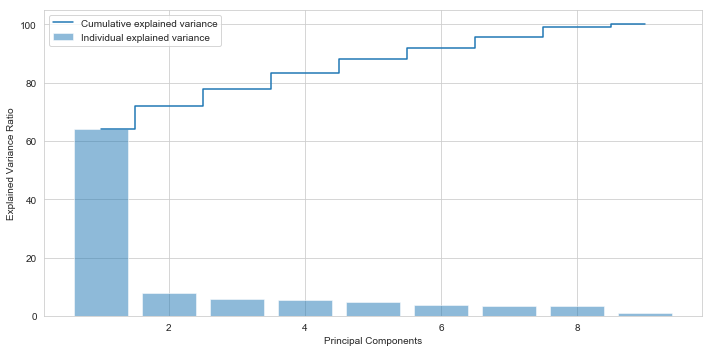

In [96]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

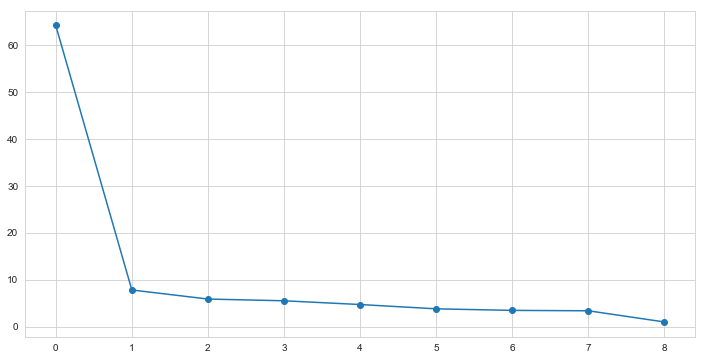

In [97]:
    '''Plotting Elbow/ Scree Plot'''
plt.figure(figsize=(12,6))
plt.plot( var_exp, marker = "o" );

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [98]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(X_std)
data_reduced.transpose()

array([[-1.47640833,  2.21005936, -1.60135593, ...,  3.88111213,
         1.9828878 ,  2.41040758],
       [ 0.07279256, -1.32615714, -0.06916928, ...,  0.96970906,
        -1.05065608, -1.37164513],
       [-0.46394345,  0.24131012,  0.07593092, ...,  0.41093954,
         0.63899528,  0.27247326],
       [ 0.60731327, -1.14114397,  0.48000883, ..., -2.2469283 ,
        -0.20984592, -0.90455409],
       [ 0.09954022, -0.97456022, -0.123399  , ...,  1.05104374,
         1.08015487,  0.18531065]])

In [99]:
pca.components_

array([[ 0.31090876,  0.37662172,  0.3722236 ,  0.33215932,  0.34170724,
         0.34576136,  0.32431567,  0.32806416,  0.25197239],
       [ 0.18218615, -0.08460074, -0.1014366 , -0.28085603, -0.143862  ,
        -0.04551995, -0.16731293, -0.00822122,  0.90534628],
       [-0.76166131, -0.15549637, -0.23595291,  0.23107856,  0.11896349,
        -0.00323973,  0.2256319 ,  0.40001871,  0.24806112],
       [ 0.27460047, -0.30318097, -0.26200588, -0.21075539, -0.40657791,
         0.24420939,  0.67135455,  0.18149035, -0.10493552],
       [ 0.12546962,  0.09165343,  0.08323404, -0.47555575,  0.16757202,
        -0.48314446, -0.05607118,  0.67345219, -0.15679625]])

# Q10 Find correlation between components and features

Text(0.5, 1.0, 'Correlation between different features')

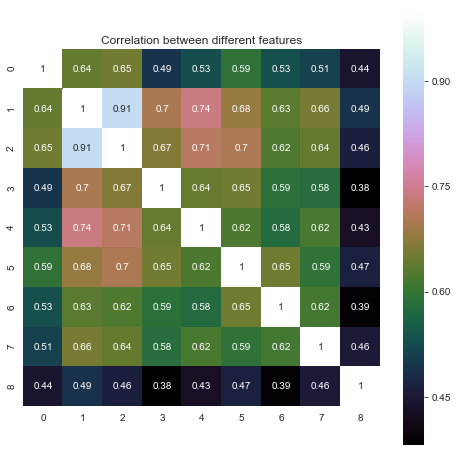

In [100]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix');

plt.title('Correlation between different features')

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [101]:
dj = pd.read_csv('jokes.csv')
dj.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [102]:
    ratings=dj[:200]
    ratings=ratings.drop(ratings.columns[0],axis=1)
    ratings.head()
    

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [103]:
col = np.arange(0,100)
ratings.columns = col
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [105]:
#14
ratings.replace(99, 00)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [106]:
#15
from sklearn.preprocessing import StandardScaler
ratings_diff = StandardScaler().fit_transform(ratings)
ratings_diff.shape

(200, 100)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [107]:
ratings_diff = pd.DataFrame(ratings_diff)
rank = ratings_diff.mean()
rank

0    -4.940492e-17
1    -6.217249e-17
2    -6.106227e-17
3     2.536860e-16
4    -8.881784e-18
5    -8.881784e-18
6    -1.665335e-18
7     2.331468e-17
8    -9.492407e-17
9     9.992007e-18
10   -2.386980e-17
11    1.126876e-16
12    6.661338e-17
13   -1.221245e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20   -4.718448e-18
21    9.020562e-17
22    3.275158e-17
23   -5.606626e-17
24    4.996004e-18
25    2.983724e-17
26   -5.440093e-17
27   -1.672273e-17
28   -2.775558e-18
29    1.054712e-17
          ...     
70    1.743050e-16
71    1.443290e-17
72    2.153833e-16
73   -6.772360e-17
74    2.997602e-17
75    4.996004e-17
76   -3.030909e-16
77    7.327472e-17
78    7.771561e-18
79   -2.886580e-16
80    3.885781e-17
81   -1.598721e-16
82   -6.328271e-17
83    1.665335e-16
84    2.642331e-16
85    2.886580e-17
86   -3.441691e-17
87    2.831069e-16
88   -2.220446e-17
89   -3.974598e-16
90    1.004752e-16
91   -3.2085

In [108]:
rank = pd.DataFrame(rank.sort_values(ascending= False))

In [110]:
rank.head(10)

,0
87,2.831069e-16
84,2.642331e-16
3,2.536860e-16
95,2.342571e-16
72,2.153833e-16
70,1.743050e-16
93,1.676437e-16
83,1.665335e-16
96,1.476597e-16
63,1.426637e-16
